# Post Testing Analysis Script

## Imports and prep

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import numpy as np

# Connecting to the drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [2]:
data_file = 'gdrive/MyDrive/Parallel_Project/times.csv'
!ls 'gdrive/MyDrive/Parallel_Project/'

analysis_script.ipynb  times.csv


## Loading the data

In [3]:
data = pd.read_csv(data_file)
print(data)

                alg_name  n_threads  n_nodes  time_in_ms
0     Depth_First_Search          0       10           0
1     Depth_First_Search          0       10           0
2     Depth_First_Search          0       10           0
3     Depth_First_Search          0       10           0
4     Depth_First_Search          0       10           0
...                  ...        ...      ...         ...
9995              A_Star          8    10000         196
9996              A_Star          8    10000         451
9997              A_Star          8    10000         432
9998              A_Star          8    10000        1538
9999              A_Star          8    10000           1

[10000 rows x 4 columns]


## Getting the average times

In [4]:
avg_data = data.groupby(['alg_name', 'n_threads', 'n_nodes']).mean()
avg_data = avg_data.reset_index()
print(avg_data)

max_time = avg_data['time_in_ms'].max()
print('Max avg time:', max_time, "ms")

    alg_name  n_threads  n_nodes  time_in_ms
0     A_Star          0       10        0.00
1     A_Star          0       50        0.00
2     A_Star          0      100        0.00
3     A_Star          0     1000        0.03
4     A_Star          0    10000       15.55
..       ...        ...      ...         ...
95  Dijkstra          8       10        0.00
96  Dijkstra          8       50        0.00
97  Dijkstra          8      100        0.00
98  Dijkstra          8     1000       16.35
99  Dijkstra          8    10000     1178.20

[100 rows x 4 columns]
Max avg time: 1178.2 ms


## Preparing the plots

In [5]:
def get_plot_data(df, alg_name):
    
    manip = df.where(df['alg_name'] == alg_name).dropna()[['n_threads', 'n_nodes', 'time_in_ms']]

    thread_groups = manip['n_threads'].unique()
    thread_groups = [str(round(x)) for x in thread_groups]

    new_data = pd.DataFrame()

    new_data['threads'] = thread_groups

    node_groups = manip['n_nodes'].unique()
    node_groups = [str(round(x)) for x in node_groups]

    for i in node_groups:
        new_col = manip[manip['n_nodes'] == float(i)]['time_in_ms'].copy().to_numpy()
        new_data[i] = new_col

    return (new_data, node_groups)

In [6]:
# avg_data.loc[avg_data['alg_name'] == 'A_Star', 'time_in_ms'] = 1
# avg_data.loc[avg_data['alg_name'] == 'Breadth_First_Search', 'time_in_ms'] = 2
# avg_data.loc[avg_data['alg_name'] == 'Depth_First_Search', 'time_in_ms'] = 3
# avg_data.loc[avg_data['alg_name'] == 'Dijkstra', 'time_in_ms'] = 4
print(avg_data)

a_star_data, x_tick_labels = get_plot_data(avg_data, 'A_Star')
bfs_data, _ = get_plot_data(avg_data, 'Breadth_First_Search')
dfs_data, _ = get_plot_data(avg_data, 'Depth_First_Search')
dijkstra_data, _ = get_plot_data(avg_data, 'Dijkstra')
print(a_star_data)
print(bfs_data)
print(dfs_data)
print(dijkstra_data)

    alg_name  n_threads  n_nodes  time_in_ms
0     A_Star          0       10        0.00
1     A_Star          0       50        0.00
2     A_Star          0      100        0.00
3     A_Star          0     1000        0.03
4     A_Star          0    10000       15.55
..       ...        ...      ...         ...
95  Dijkstra          8       10        0.00
96  Dijkstra          8       50        0.00
97  Dijkstra          8      100        0.00
98  Dijkstra          8     1000       16.35
99  Dijkstra          8    10000     1178.20

[100 rows x 4 columns]
  threads   10   50  100  1000   10000
0       0  0.0  0.0  0.0  0.03   15.55
1       1  0.0  0.0  0.0  0.38  335.69
2       2  0.0  0.0  0.0  0.48  406.92
3       4  0.0  0.0  0.0  0.65  488.95
4       8  0.0  0.0  0.0  1.12  604.73
  threads   10   50  100  1000  10000
0       0  0.0  0.0  0.0  0.61   2.18
1       1  0.0  0.0  0.0  0.34   1.22
2       2  0.0  0.0  0.0  0.43   2.04
3       4  0.0  0.0  0.0  0.48   2.15
4       8  0

## Plotting The Data

### DFS

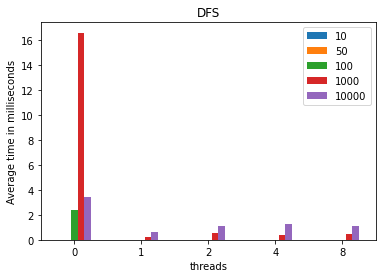

In [7]:
ax = dfs_data.plot(x='threads', y=x_tick_labels, kind="bar", rot=0)
ax.set_ylabel('Average time in milliseconds')
# ax.set_ylim(0, 100)
ax.set_title('DFS')

plt.show()

### BFS

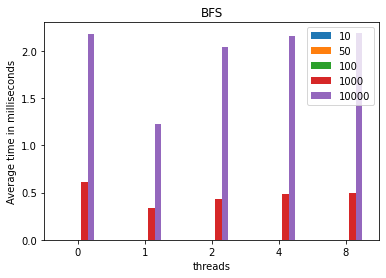

In [8]:
ax = bfs_data.plot(x='threads', y=x_tick_labels, kind="bar", rot=0)
ax.set_ylabel('Average time in milliseconds')
# ax.set_ylim(0, 100)
ax.set_title('BFS')
plt.show()

### Dijkstra

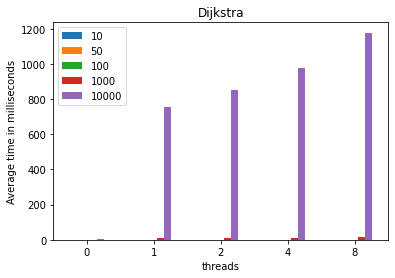

In [9]:
ax = dijkstra_data.plot(x='threads', y=x_tick_labels, kind="bar", rot=0)
ax.set_ylabel('Average time in milliseconds')
# ax.set_ylim(0, 100)
ax.set_title('Dijkstra')

plt.show()

### A*

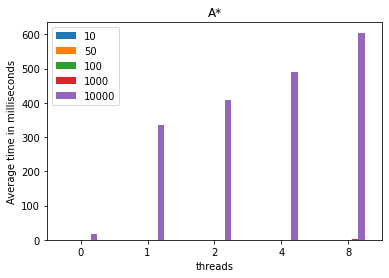

In [12]:
ax = a_star_data.plot(x='threads', y=x_tick_labels, kind="bar", rot=0)
ax.set_ylabel('Average time in milliseconds')
# ax.set_ylim(0, 100)
ax.set_title('A*')

plt.show()

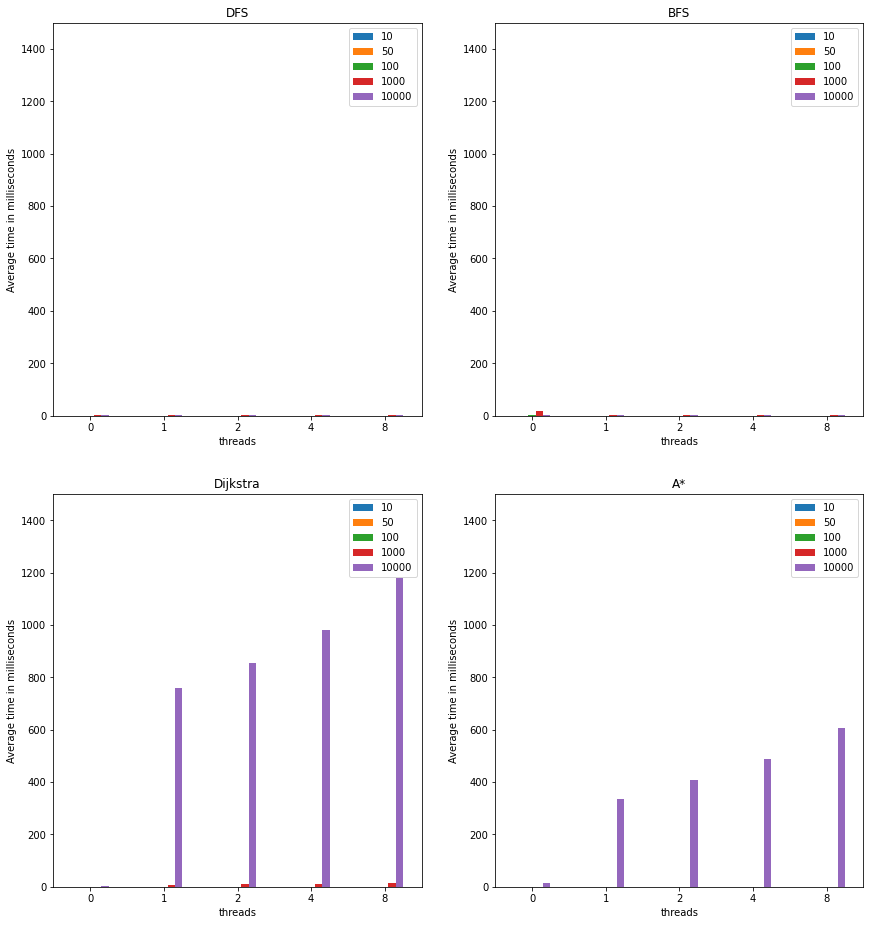

In [11]:
max = 1500
fig, axs = plt.subplots(2, 2)

axs[0,0].set_ylabel('Average time in milliseconds')
axs[0,1].set_ylabel('Average time in milliseconds')
axs[1,0].set_ylabel('Average time in milliseconds')
axs[1,1].set_ylabel('Average time in milliseconds')

axs[0,0].set_ylim(0, max)
axs[0,1].set_ylim(0, max)
axs[1,0].set_ylim(0, max)
axs[1,1].set_ylim(0, max)

axs[0,0].set_title('DFS')
axs[0,1].set_title('BFS')
axs[1,0].set_title('Dijkstra')
axs[1,1].set_title('A*')


bfs_data.plot(ax = axs[0,0], x='threads', y=x_tick_labels, kind="bar", rot=0)
dfs_data.plot(ax = axs[0,1], x='threads', y=x_tick_labels, kind="bar", rot=0)
dijkstra_data.plot(ax = axs[1,0], x='threads', y=x_tick_labels, kind="bar", rot=0)
a_star_data.plot(ax = axs[1,1], x='threads', y=x_tick_labels, kind="bar", rot=0)

plt.subplots_adjust(bottom=1, right=2, top=4)